# **Mitigation Bias using Fairlet clustering**


## **Load the data**

In [2]:
# Imports
import numpy as np
import pandas as pd

#sys
import sys
sys.path.append('../../')

In [54]:
# Get data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tutorials.utils.datasets import preprocessed_dataset
#from tutorials.utils.plotting import density_group_by_cluster
from sklearn.datasets import make_blobs
#train_data , test_data = preprocessed_dataset('adult')
import numpy as np

Xa, ya = make_blobs(n_samples=5000, centers=20, n_features=2)
Xb, yb = make_blobs(n_samples=5000, centers=20, n_features=2)
X = np.concatenate([Xa, Xb], axis=0)
p_attr = np.concatenate([np.zeros(5000), np.ones(5000)], axis=0)
p_attr = np.concatenate([np.zeros(5000), np.ones(5000)], axis=0)
group_a = p_attr
group_b = 1 - p_attr
#train_data , test_data = preprocessed_dataset('adult')
#X,y,group_a,group_b = [d[:10000] for d in train_data]

In [55]:
from holisticai.mitigation.bias import FairKCenterClustering
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import pandas as pd

Xt = StandardScaler().fit_transform(X)

strategies = ['Fair K-Center', 'Heuristic Greedy by Group', 'Heuristic Greedy by Constraint']
models = []
y_preds = []
for i,strategy in enumerate(strategies):
    model = FairKCenterClustering(req_nr_per_group=[5 , 5], nr_initially_given=0, strategy=strategy, seed=42)
    model.fit(Xt, group_a, group_b)
    models.append(model)
    y_pred = model.predict(Xt)
    y_preds.append(y_pred)

In [56]:
costs = [{'Strategy':strategies[i], 'Cost':model.cost } for i,model in enumerate(models)]
pd.DataFrame(costs)

,Strategy,Cost
0,Fair K-Center,1.467253
1,Heuristic Greedy by Group,1.742015
2,Heuristic Greedy by Constraint,1.467253


In [57]:
from holisticai.mitigation.bias import FairKCenterClustering
from holisticai.pipeline import Pipeline
import matplotlib.pyplot as plt 
import pandas as pd

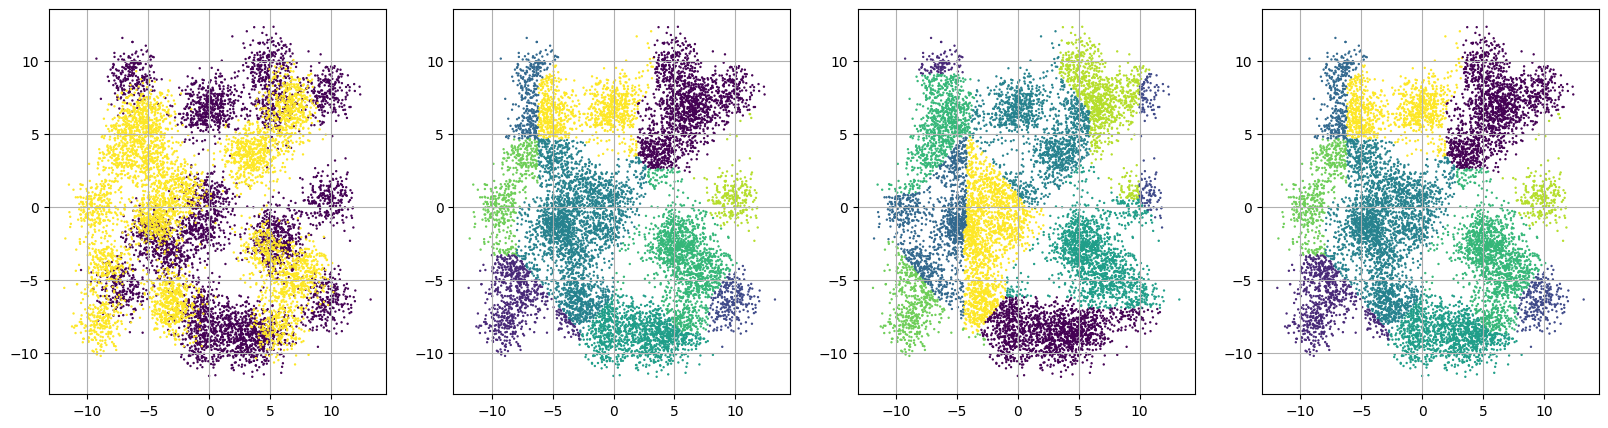

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.scatter(X[:,0], X[:,1],s=0.5, c=p_attr)
plt.grid()
for i,y_pred in enumerate(y_preds):
    plt.subplot(1, len(y_preds)+1, i+2)
    plt.scatter(X[:,0], X[:,1],s=0.5, c=y_pred)
    plt.grid()

In [59]:
from holisticai.metrics.bias import clustering_bias_metrics
bias_metrics = []
for i,(y_pred,model) in enumerate(zip(y_preds,models)):
    bias_metrics.append(clustering_bias_metrics(group_a, group_b, y_pred, X, 
                            model.all_centroids, 
                            metric_type='both'))

../..\holisticai\utils\_recommender_tools.py:233: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../..\holisticai\utils\_recommender_tools.py:233: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../..\holisticai\utils\_recommender_tools.py:233: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
../..\holisticai\utils\_recommender_tools.py:233: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


In [62]:
pd.concat([bias_metrics[0].iloc[:,0], bias_metrics[1].iloc[:,0], bias_metrics[2]], axis=1)

,Value,Value,Value,Reference
Metric,,,,
Cluster Balance,4.255319e-23,1.212121e-22,4.255319e-23,1
Minimum Cluster Ratio,1.234568e-02,0.000000e+00,1.234568e-02,1
Cluster Distribution Total Variation,3.146000e-01,3.046000e-01,3.146000e-01,0
Cluster Distribution KL Div,inf,3.628763e-01,inf,0
Social Fairness Ratio,8.941014e-01,8.837362e-01,8.941014e-01,1
Silhouette Difference,-9.934654e-02,-1.582601e-02,-9.934654e-02,0
